<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')

In [24]:
df.head()

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,Recent_Date,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Recent_Creatinine,Recent_eGFR
0,0,2299,3386255,-7.158596,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2559-08-15 08:13:26.043,...,91.0,5.400,215.0,81.0,123.0,99.0,57.671,1,0.73,79.14
1,1,2299,4546471,5.550691,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2560-10-03 07:37:22.777,...,86.0,5.567,219.0,64.0,146.0,73.0,146.106,1,0.73,79.14
2,2,2299,5812902,-6.063710,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2561-12-12 07:58:57.190,...,100.0,5.300,193.0,62.0,129.0,65.0,50.831,1,0.73,79.14
3,3,2299,6947220,-12.812245,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2562-12-19 08:19:38.647,...,89.0,5.292,205.0,69.0,139.0,76.0,121.937,1,0.73,79.14
4,4,2299,8186767,28.287500,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2564-03-04 07:55:40.703,...,88.0,5.500,198.0,74.0,129.0,60.0,41.564,1,0.73,79.14


In [25]:
df.shape

(52620, 84)

In [39]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Hear

In [63]:
selected_columns = ['InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
data = df[selected_columns]
data.head()

,InPatient,OutPatient,Emergency,Sex,Age,NATNL,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,0,1,0,1,73,0,90,0,0,0,...,41.678,4.9104,195.63,91.0,5.400,215.0,81.0,123.0,99.0,57.671
1,0,1,0,1,74,0,90,90,0,0,...,41.409,5.6073,267.72,86.0,5.567,219.0,64.0,146.0,73.0,146.106
2,0,1,0,1,75,0,100,100,34,0,...,32.400,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,50.831
3,0,1,0,1,76,0,35,0,1,35,...,41.351,5.2678,199.66,89.0,5.292,205.0,69.0,139.0,76.0,121.937
4,0,1,0,1,78,0,100,0,15,0,...,34.600,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,41.564


PCA

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# สร้าง StandardScaler
scaler = StandardScaler()

# นำข้อมูลมาทำการ scale
# คอลัมน์ที่ไม่ต้องการทำ scaling ถูกนำออก
columns_to_exclude = ['InPatient', 'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL']

# ดึงข้อมูลที่ต้องการทำ scaling จากตัวแปร data
data_to_scale = data.drop(columns=columns_to_exclude)
scale_data = scaler.fit_transform(data_to_scale)

# นำข้อมูลที่ถูก scale แล้วไปใส่ใน DataFrame ใหม่
scale_data = pd.DataFrame(scale_data, columns=data_to_scale.columns)
scale_data [['InPatient', 'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL']] = data [['InPatient', 'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL']]
scale_data

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,...,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,Sex,Age,NATNL
0,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,-0.223949,...,-0.843492,0.306227,3.930974,-0.487620,0,1,0,1,73,0
1,2.991739,1.392719,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,-0.223949,...,-1.081069,0.945928,1.766080,0.847718,0,1,0,1,74,0
2,3.360578,1.625099,4.073425,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,-0.223949,...,-1.109019,0.473106,1.099958,-0.590902,0,1,0,1,75,0
3,0.963126,-0.698699,-0.005894,2.205286,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,-0.223949,...,-1.011194,0.751236,2.015875,0.482774,0,1,0,1,76,0
4,3.360578,-0.698699,1.724726,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,-0.223949,...,-0.941318,0.473106,0.683633,-0.730831,0,1,0,1,78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3.360578,1.625099,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,2.69524,4.688580,...,2.370785,-0.778482,-0.731875,0.624152,0,1,0,0,63,0
52616,-0.327810,1.625099,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,4.688580,...,0.763646,-0.806295,-0.815140,3.561035,0,1,0,1,71,0
52617,-0.327810,-0.698699,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,-0.223949,...,-0.633865,-1.334743,-1.564527,-0.349745,0,0,1,0,66,0
52618,-0.327810,-0.698699,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,-0.223949,...,-0.249410,0.767646,0.235666,-0.304764,0,1,0,0,67,0


In [65]:
scale_data.describe().round(2)

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,...,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,Sex,Age,NATNL
count,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,...,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00
mean,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,...,0.00,0.00,0.00,0.00,0.09,0.87,0.04,0.48,66.81,0.01
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,0.28,0.34,0.20,0.50,11.65,0.17
min,-0.33,-0.70,-0.13,-0.18,-0.33,-0.34,-0.09,-0.28,-0.41,-0.22,...,-1.70,-3.09,-3.98,-1.36,0.00,0.00,0.00,0.00,18.00,0.00
25%,-0.33,-0.70,-0.13,-0.18,-0.33,-0.34,-0.09,-0.28,-0.41,-0.22,...,-0.55,-0.64,-0.53,-0.67,0.00,1.00,0.00,0.00,60.00,0.00
50%,-0.33,-0.70,-0.13,-0.18,-0.33,-0.34,-0.09,-0.28,-0.41,-0.22,...,-0.20,-0.05,-0.05,-0.19,0.00,1.00,0.00,0.00,67.00,0.00
75%,-0.33,0.93,-0.13,-0.18,-0.33,-0.34,-0.09,-0.28,-0.41,-0.22,...,0.25,0.42,0.40,0.49,0.00,1.00,0.00,1.00,75.00,0.00
max,13.13,8.60,24.59,16.97,10.40,7.35,26.48,10.03,9.37,13.09,...,28.64,16.16,12.01,34.28,1.00,1.00,1.00,1.00,102.00,3.00


In [66]:
pca = PCA() #ไม่ได้กำหนดจำนวน components ที่ต้องการ
pca.fit_transform(scale_data)

print(f'explained_variance  = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio  = {pca.explained_variance_ratio_}') #แต่ละ component อธิบาย varience ได้เท่าไหร่
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance  = [1.35868657e+02 3.95691409e+00 3.45438237e+00 2.57702944e+00
 2.39199849e+00 1.86499100e+00 1.50145212e+00 1.48246155e+00
 1.36601429e+00 1.27615245e+00 1.22875778e+00 1.14150522e+00
 1.08879182e+00 1.07304530e+00 1.06495708e+00 1.05141760e+00
 1.04846826e+00 1.03764445e+00 1.03158202e+00 1.02040520e+00
 1.01845528e+00 1.01578188e+00 1.01269226e+00 1.00663120e+00
 1.00416270e+00 9.99137430e-01 9.96919681e-01 9.91488553e-01
 9.87745328e-01 9.83291509e-01 9.79033297e-01 9.73003522e-01
 9.68338867e-01 9.61111511e-01 9.54805929e-01 9.50045618e-01
 9.45942471e-01 9.37431396e-01 9.18421864e-01 9.01243703e-01
 8.86550934e-01 8.71203624e-01 8.45919499e-01 8.30550352e-01
 7.92003887e-01 7.66971436e-01 7.51990511e-01 7.29758001e-01
 7.19257148e-01 7.04884383e-01 6.69821236e-01 6.31044681e-01
 5.99599385e-01 5.85830717e-01 5.46096896e-01 5.29618589e-01
 4.82950431e-01 4.42188700e-01 4.12812759e-01 3.51606155e-01
 2.49800350e-01 1.96445869e-01 1.37191771e-01 1.29862619e-01
 1

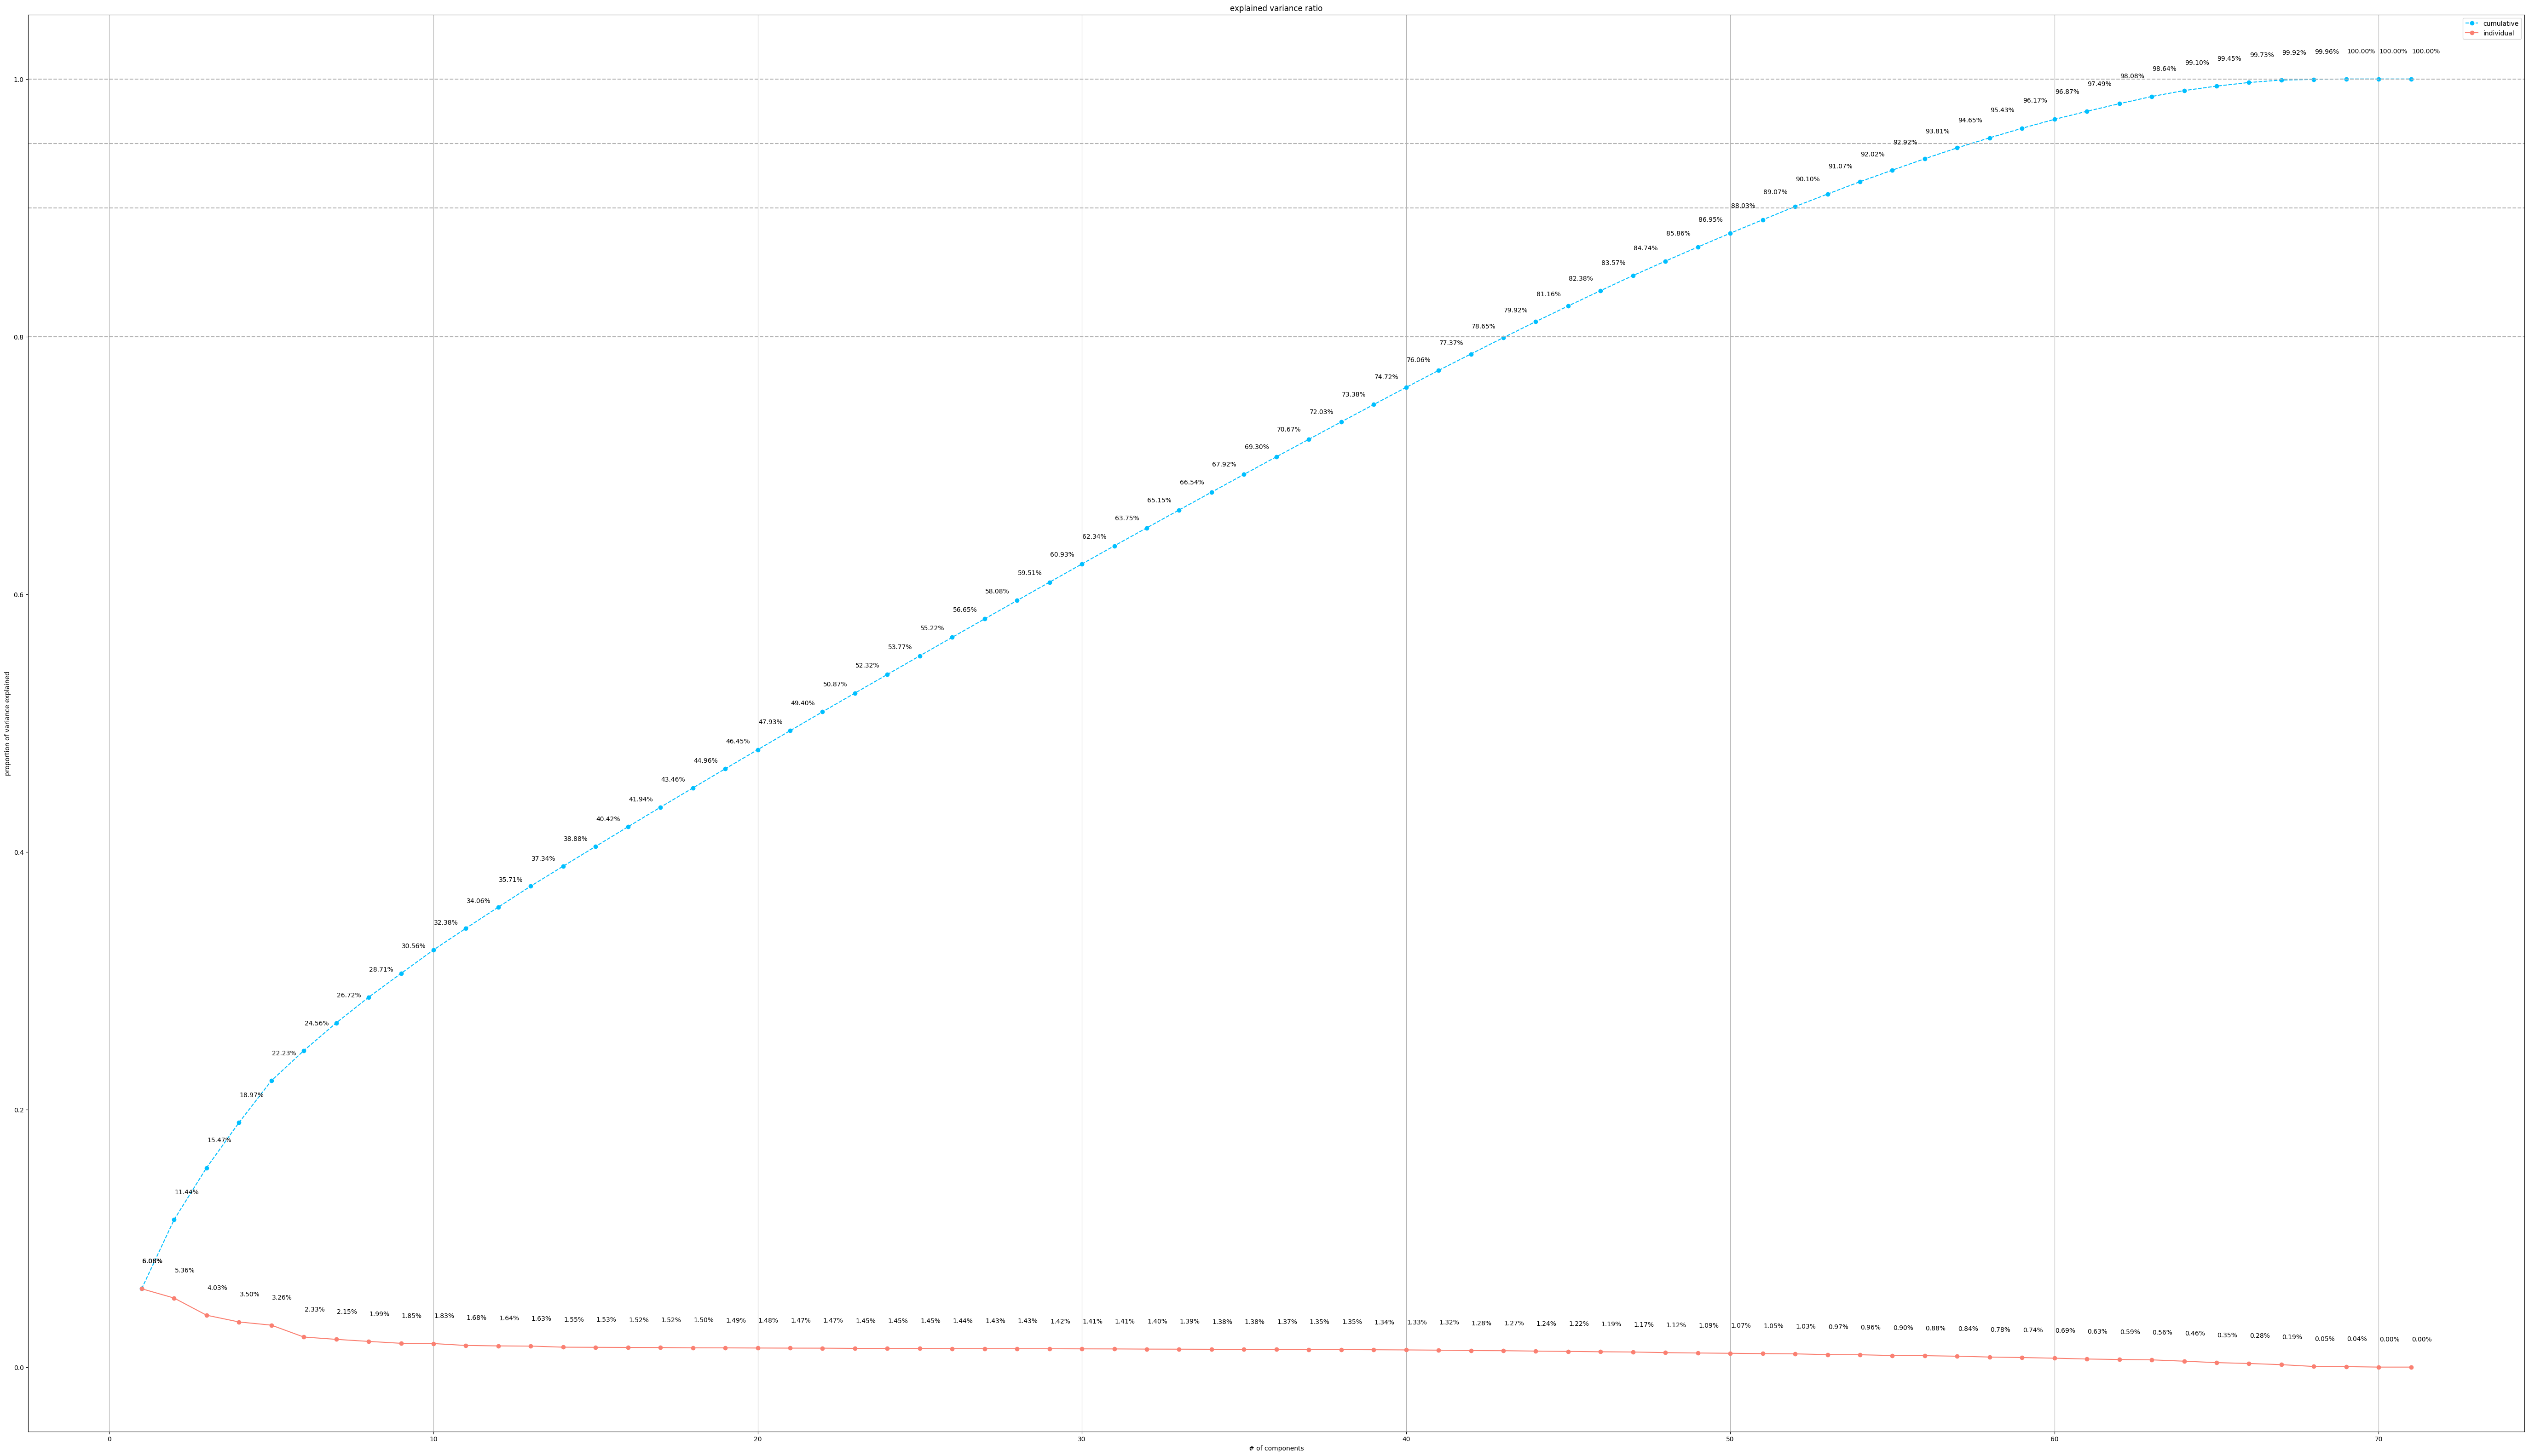

In [71]:
# ในส่วนที่ทำ Scree Plot
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(70, 40)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t = scaler.fit_transform(X)

    max_components = min(X.shape)
    x = np.arange(1, n_components + 1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1 = pca.explained_variance_ratio_[:n_components]
    y2 = np.cumsum(pca.explained_variance_ratio_)[:n_components]

    plt.figure(figsize=figsize)

    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker='o', label='cumulative', color='deepskyblue')

    plt.plot(x, y1, linestyle='-', marker='o', label='individual', color='salmon')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']),
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
            plt.text(n + .02, v + .02, f'{v * 100:.2f}%', fontsize=10)
            if with_cumulative:
                plt.text(n + .02, cv + .02, f'{cv * 100:.2f}%', fontsize=10)

    plt.show()
scree_plot(scale_data, n_components=71, with_cumulative=True, show_data_label=True)


ตัวแปรมีทั้งหมด 71 ตัวแปร ถ้าพิจารณาที่ค่า explained variance  90% ขึ้นไป จะได้ 53 componance สมารถอธิบายข้อมูลได้ 90.10%

In [72]:
pca.components_.round(4) # Eigenvectors

array([[-3.300e-03, -7.900e-03, -1.600e-03, ..., -2.700e-03, -9.992e-01,
        -3.000e-04],
       [ 1.709e-01,  3.265e-01, -1.780e-02, ..., -1.430e-02, -3.900e-03,
        -3.000e-04],
       [-7.550e-02, -1.376e-01, -1.250e-02, ...,  1.410e-02, -4.600e-03,
         6.000e-04],
       ...,
       [ 2.300e-03,  5.000e-04,  2.200e-03, ...,  3.000e-04, -3.000e-04,
         2.380e-02],
       [ 0.000e+00, -0.000e+00,  0.000e+00, ..., -0.000e+00, -0.000e+00,
        -0.000e+00],
       [-0.000e+00, -0.000e+00, -0.000e+00, ..., -0.000e+00,  0.000e+00,
         0.000e+00]])

In [79]:

# ให้ features ของ scale_data เป็น index
dpc = pd.DataFrame(pca.components_.T,
                   index=scale_data.columns,
                   columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4)

# ทำการแปลงข้อมูลให้เป็น DataFrame ที่มีขนาดเล็กขึ้น
dpc_small = dpc.iloc[:71, :]
dpc_small.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71
G1M2-ARB,-0.003300,0.170900,-0.075500,-0.075800,-0.011000,-0.077800,0.126600,0.014800,0.014300,-0.087200,0.128300,-0.075200,0.398200,-0.363100,0.110700,-0.030600,-0.088600,-0.021800,-0.037700,-0.193000,-0.056200,0.134400,-0.032900,-0.016900,0.021400,0.002900,-0.071700,0.036800,0.063800,-0.014500,-0.173700,0.001500,-0.047400,-0.039400,-0.107400,0.028100,0.030900,0.077900,0.068000,-0.000000,-0.040700,0.117800,-0.095300,-0.253900,0.015800,-0.081600,0.129900,0.173800,0.109000,-0.077300,-0.381300,0.224100,0.104400,-0.026600,-0.063100,0.069800,-0.266900,0.098200,-0.078100,-0.005000,-0.013700,-0.013000,0.007000,-0.014200,0.006100,0.002200,0.000700,-0.001400,0.002300,0.000000,-0.000000
G3M1-Statin,-0.007900,0.326500,-0.137600,-0.125600,0.011300,-0.018700,0.108600,-0.010100,-0.149100,0.051600,-0.090500,-0.027800,0.074000,0.011500,0.064300,-0.012600,-0.001100,-0.011000,0.019700,-0.060000,0.004800,-0.011100,-0.005500,-0.001000,-0.001500,-0.021400,-0.004400,0.036300,-0.003400,0.007500,-0.056100,-0.038900,-0.010900,0.020000,0.002700,0.055700,0.041900,0.035800,0.020600,-0.051000,-0.007200,-0.051400,-0.094100,0.039200,0.020600,-0.090000,0.056800,0.174000,-0.119800,0.084600,-0.105000,-0.145300,0.122900,0.037300,0.084700,-0.122900,0.286800,-0.296200,0.676100,0.081000,0.009100,0.008200,0.007900,-0.019600,0.010500,0.011300,0.001200,0.000800,0.000500,-0.000000,-0.000000
G5M2-NSAIDs,-0.001600,-0.017800,-0.012500,0.013700,-0.001000,-0.086700,0.035600,0.038700,-0.051300,-0.076400,0.041800,0.011100,0.210600,0.021800,-0.306700,-0.342400,0.124400,0.122000,-0.008800,0.185100,0.158300,-0.188400,0.162000,-0.123400,-0.217900,0.134300,-0.096100,-0.259300,0.069800,0.102500,0.267000,-0.163100,-0.305600,0.133900,-0.011200,0.029600,-0.048900,0.110900,-0.043000,0.162400,-0.019100,0.308800,-0.168800,0.074800,0.001000,-0.030200,0.062400,0.054000,-0.042900,0.072100,-0.006100,0.005800,0.004900,-0.012300,0.006600,-0.005700,-0.005500,0.012000,0.006700,-0.002000,-0.007200,0.000100,0.010300,-0.005300,0.005800,0.003600,-0.002400,-0.000400,0.002200,0.000000,-0.000000
G1M5-Diuretic,-0.003200,0.086700,0.011000,-0.012800,0.027100,0.060500,0.111500,-0.048500,-0.182700,0.451100,0.207600,0.014100,0.143100,-0.106800,0.120100,-0.145600,0.022500,-0.095400,0.020100,0.048300,0.085700,-0.028600,0.082400,-0.023600,-0.016100,-0.059900,0.007200,-0.051800,0.052400,-0.022500,0.034600,-0.065900,0.042200,0.015900,-0.020400,-0.170900,0.119300,0.066000,-0.133400,-0.287200,0.027200,0.148100,0.233500,-0.105700,0.141400,0.113000,-0.383900,-0.305800,-0.147100,0.130900,-0.104700,-0.046700,-0.029400,-0.035400,-0.066400,0.027300,0.058800,0.070800,-0.016700,0.008800,-0.034100,0.001300,0.020000,0.001400,-0.000700,0.004200,-0.000800,0.001200,0.002200,-0.000000,-0.000000
G1M7-Beta-blocker,-0.003000,0.164000,-0.019300,-0.087000,0.063900,0.121600,0.227700,-0.108600,-0.170400,0.241800,0.289600,-0.033500,-0.057400,0.046400,-0.030500,0.022800,-0.031800,0.058700,-0.016000,0.054800,-0.093400,0.001400,-0.070500,-0.051000,0.073100,0.025400,0.011500,0.028600,-0.025800,-0.017100,-0.011000,0.032000,-0.041700,0.074900,0.033200,0.114100,0.071900,-0.017600,-0.084200,0.117700,-0.059000,0.027100,-0.045000,-0.201400,0.067200,0.050700,0.021600,0.437800,-0.148300,-0.205000,0.529300,0.108300,-0.035400,-0.024500,-0.051500,-0.038900,-0.043000,0.013400,-0.107100,-0.023800,-0.007000,-0.004500,0.009900,-0.008400,0.005900,0.004700,-0.002200,-0.000700,0.001900,0.000000,0.000000
G1M3-Dihydropyridine-CCB,-0.005300,0.206300,-0.042900,-0.089600,0.079000,0.005600,0.209300,-0.102900,0.037000,-0.193900,0.133700,0.015900,0.044000,0.007600,-0.034900,-0.033300,-0.014300,0.075000,0.042100,0.015800,-0.